In [2]:
#RANDOM SAMPLING FOR W SWEEP
from scipy.stats import qmc
import pandas as pd

#No control sampling
sampler = qmc.LatinHypercube(d=2)
sample = sampler.random(n=500)
l_bounds = [10E-7, 10E-7]
u_bounds = [10E-3, 10E-3]
sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
nc_lhc = pd.DataFrame({'k_ino1':sample_scaled[:,0], 'theta_ino1':1., 'k_miox':sample_scaled[:,1], 'theta_miox':1.})
nc_lhc.to_csv('exp_data/nc_lhc.csv')

#Upstream repression sampling
sampler = qmc.LatinHypercube(d=3)
sample = sampler.random(n=500)
l_bounds = [10E-7, 10E-7, 10E-7]
u_bounds = [10E-3, 10, 10E-3]
sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
ur_lhc = pd.DataFrame({'k_ino1':sample_scaled[:,0], 'theta_ino1':sample_scaled[:,1], 'k_miox':sample_scaled[:,2], 'theta_miox':1.})
ur_lhc.to_csv('exp_data/ur_lhc.csv')

#Downstream activation sampling
sampler = qmc.LatinHypercube(d=3)
sample = sampler.random(n=500)
l_bounds = [10E-7, 10E-7, 10E-7]
u_bounds = [10E-3, 10E-3, 10]
sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
da_lhc = pd.DataFrame({'k_ino1':sample_scaled[:,0], 'theta_ino1':1., 'k_miox':sample_scaled[:,1], 'theta_miox':sample_scaled[:,2]})
da_lhc.to_csv('exp_data/da_lhc.csv')

#Dual control sampling
sampler = qmc.LatinHypercube(d=4)
sample = sampler.random(n=500)
l_bounds = [10E-7, 10E-7, 10E-7, 10E-7]
u_bounds = [10E-3, 10, 10E-3, 10]
sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
dc_lhc = pd.DataFrame({'k_ino1':sample_scaled[:,0], 'theta_ino1':sample_scaled[:,1], 'k_miox':sample_scaled[:,2], 'theta_miox':sample_scaled[:,3]})
dc_lhc.to_csv('exp_data/dc_lhc.csv')

In [2]:
###PYTHON NOTEBOOK FOR VISUALIZATION OF FIGURES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
from scipy.stats import linregress

In [3]:
fba_data_dc = pd.read_csv("exp_data/dc/sim_fba_data_dc.csv")
ode_data_dc = pd.read_csv("exp_data/dc/sim_ode_data_dc.csv")
sum_data_dc = pd.read_csv("exp_data/dc/sum_data_dc.csv")

fba_data_nc = pd.read_csv("exp_data/nc/sim_fba_data_nc.csv")
ode_data_nc = pd.read_csv("exp_data/nc/sim_ode_data_nc.csv")
sum_data_nc = pd.read_csv("exp_data/nc/sum_data_nc.csv")

In [5]:
#compute sum under lam curve
burdens1 = []
burdens2 = []
for w in fba_data_dc.W.unique():
    fba_data = fba_data_dc.loc[fba_data_dc.W == w].reset_index(drop=True)
    burden1 = sum(fba_data.lam[0] - fba_data.lam)
    burden2 = fba_data.lam[0] - fba_data.lam[len(fba_data)-1]
    burdens1.append(burden1)
    burdens2.append(burden2)
sum_data_dc['sum_burden'] = burdens1
sum_data_dc['delta_burden'] = burdens2

burdens1 = []

burdens2 = []
for w in fba_data_nc.W.unique():
    fba_data = fba_data_nc.loc[fba_data_nc.W == w].reset_index(drop=True)
    burden1 = sum(fba_data.lam[0] - fba_data.lam)
    burden2 = fba_data.lam[0] - fba_data.lam[len(fba_data)-1]
    burdens1.append(burden1)
    burdens2.append(burden2)
sum_data_nc['sum_burden'] = burdens1
sum_data_nc['delta_burden'] = burdens2

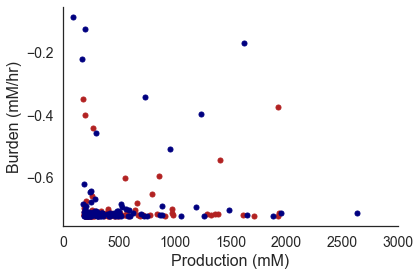

In [33]:
###FIGURE: Burden vs. production
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Production (mM)', fontsize=16)
ax.set_ylabel('Burden (mM/hr)', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)

ax.plot(sum_data_nc.ga_tot, -sum_data_nc.delta_burden, '.', c='firebrick', ms=10)
ax.plot(sum_data_dc.ga_tot, -sum_data_dc.delta_burden, '.', c='navy', ms=10)
ax.set_xlim([0, 3000])
fig.tight_layout()


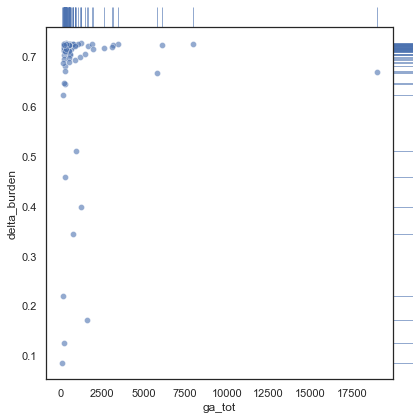

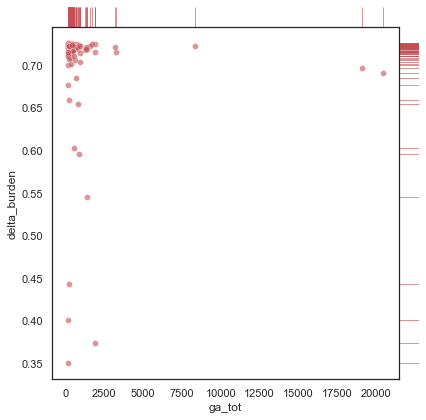

In [30]:
import seaborn as sns

g = sns.JointGrid(data=sum_data_dc, x="ga_tot", y="delta_burden", space=0, ratio=17)
g.plot_joint(sns.scatterplot,
             color="b", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="b", alpha=.6)

g = sns.JointGrid(data=sum_data_nc, x="ga_tot", y="delta_burden", space=0, ratio=17)
g.plot_joint(sns.scatterplot,
             color="r", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="r", alpha=.6)